### 01. Importing Dependencies

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt

### 02. Loading dataset

In [9]:
df = pd.read_csv("data/processed/Telco_missing_values_handled.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 03. Plotting

#### 3.1 Distribution Plots

In [10]:
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_columns = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

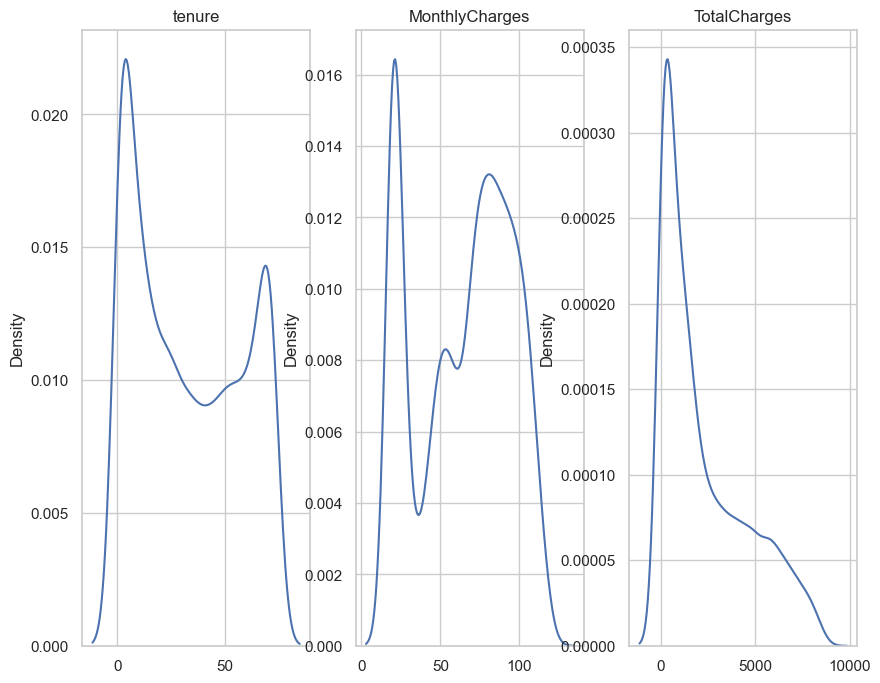

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(10, 8))
axes = axes.flatten()
for idx,col in enumerate(numerical_columns):
        sns.kdeplot(
                    data=df[col],
                    ax=axes[idx]
                    )
        axes[idx].set_title(col)
        axes[idx].set_xlabel('')


#### 3.2 Bar plot

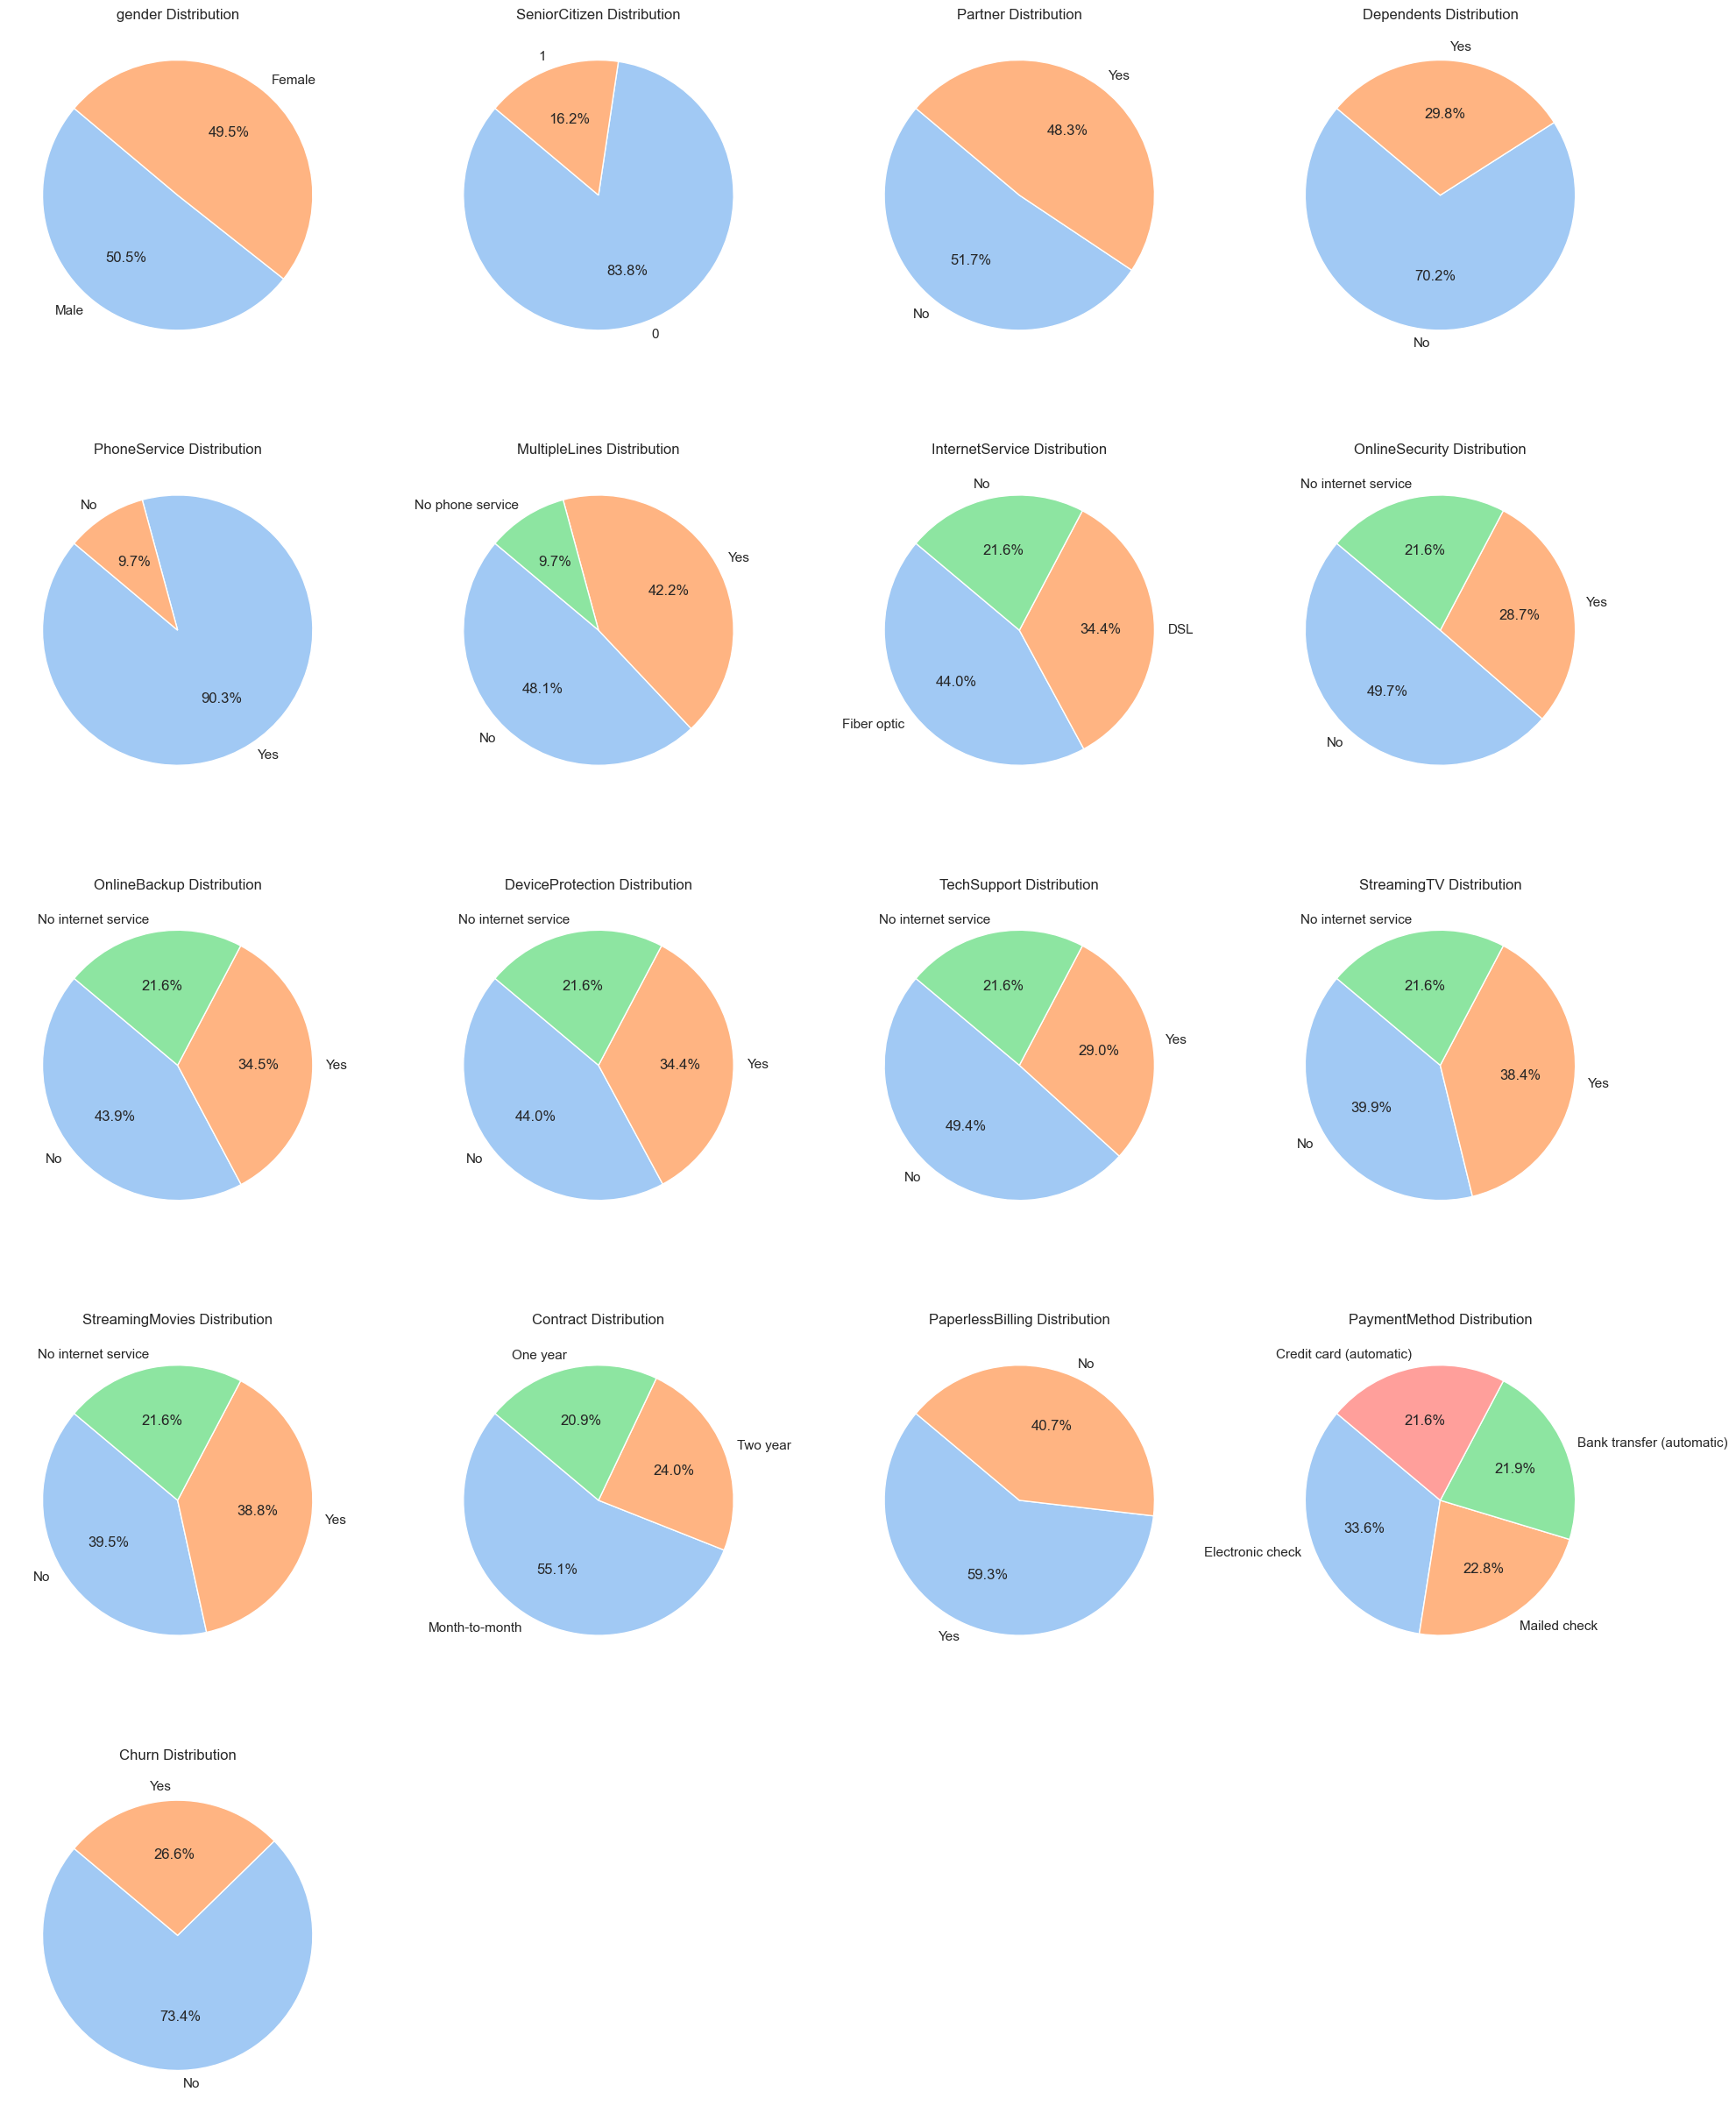

In [12]:
sns.set(style="whitegrid")

# Determine grid size
n_cols = 4
n_rows = math.ceil(len(categorical_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*5))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    counts = df[col].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, 
                colors=sns.color_palette("pastel"))
    axes[i].set_title(f'{col} Distribution')

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### 3.3 Box plot

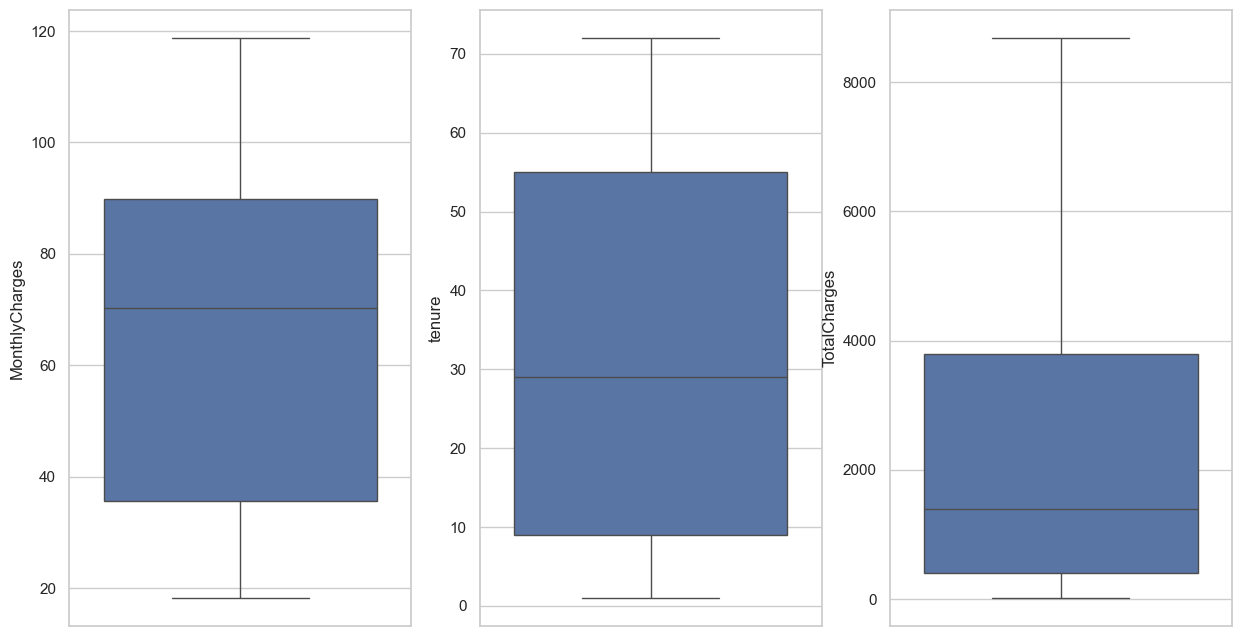

In [16]:
                    
fig, axes = plt.subplots(1, 3, figsize=(15, 8))
sns.boxplot(data=df['MonthlyCharges'], ax=axes[0])
sns.boxplot(data=df['tenure'], ax=axes[1])
sns.boxplot(data=df['TotalCharges'], ax=axes[2])

plt.show()

#### 3.4  sigma Rule

In [17]:
def find_anomaly(data):
    mean = data.mean()
    std = data.std()

    upper_bound = mean + (3 * std)
    lower_bound = mean - (3 * std)

    return (data > upper_bound) | (data < lower_bound)

In [23]:
for col in numerical_columns:
    n_outliers = find_anomaly(df[col]).sum()
    n_outlier_percentage = round(n_outliers / len(df),3)
    print(f"{col} : {n_outliers} outliers ({n_outlier_percentage} %)")

tenure : 0 outliers (0.0 %)
MonthlyCharges : 0 outliers (0.0 %)
TotalCharges : 0 outliers (0.0 %)


#### 3.5 IQR method

In [24]:
def find_anomaly(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    IQR = Q3 - Q1 

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR 

    return (data > upper_bound) | (data < lower_bound)

In [25]:
for col in numerical_columns:
    n_outliers = find_anomaly(df[col]).sum()
    n_outlier_percentage = round(n_outliers / len(df), 3)
    print(f"{col} : {n_outliers} outliers ({n_outlier_percentage} %)")

tenure : 0 outliers (0.0 %)
MonthlyCharges : 0 outliers (0.0 %)
TotalCharges : 0 outliers (0.0 %)
